## Perceptron Model

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hinge_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('processed_df.csv')
df.head()

,Unnamed: 0,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [5]:
# Drop 'ID' column so we don't use it for the prediction
df = df.drop(columns=['ID', 'Unnamed: 0'])

# Split into X and y, so that y represents the values we are trying to predict
X = df.drop(columns = ['class'])
y = df['class']

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train the model
model = Perceptron()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [7]:
# Compare y_pred and y visually
ydf = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
ydf.head(10)

,y_test,y_pred
155,0,1
144,0,0
101,0,0
127,0,0
140,0,0
138,0,0
42,1,0
15,1,1
126,0,0
65,1,1


In [8]:
# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {test_accuracy:.2f}')

Training accuracy: 1.0
Testing accuracy: 0.89


In [9]:
# Classification Report
print(f'Testing Data: {classification_report(y_test, y_pred)}')
print(f'Training Data: {classification_report(y_train, y_train_pred)}')

Testing Data:               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35

Training Data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        69

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



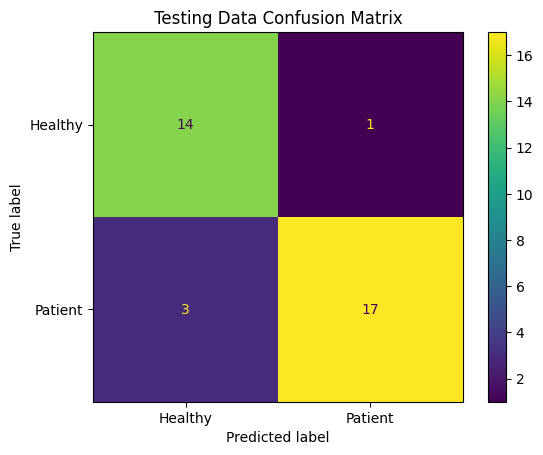

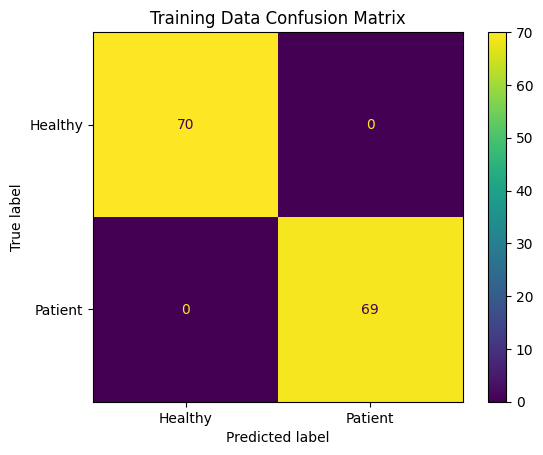

In [10]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Patient'])
cmdisp.plot()
plt.title('Testing Data Confusion Matrix')
plt.show()

cm2 = confusion_matrix(y_train, y_train_pred)
cmdisp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Healthy', 'Patient'])
cmdisp2.plot()
plt.title('Training Data Confusion Matrix')
plt.show()

In [11]:
# Iterate to Optimize Weights
epochs = 20
training_accuracies = []
testing_accuracies = []
testing_losses = []
training_losses = []

model = Perceptron(max_iter=1, eta0=0.1, random_state=42)

for epoch in range(epochs):
  model.partial_fit(X_train, y_train, classes=np.unique(y_train))

  y_pred = model.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred)
  testing_accuracies.append(test_accuracy)

  y_train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  training_accuracies.append(train_accuracy)

  test_loss = hinge_loss(y_test, y_pred)
  testing_losses.append(test_loss)

  train_loss = hinge_loss(y_train, y_train_pred)
  training_losses.append(train_loss)

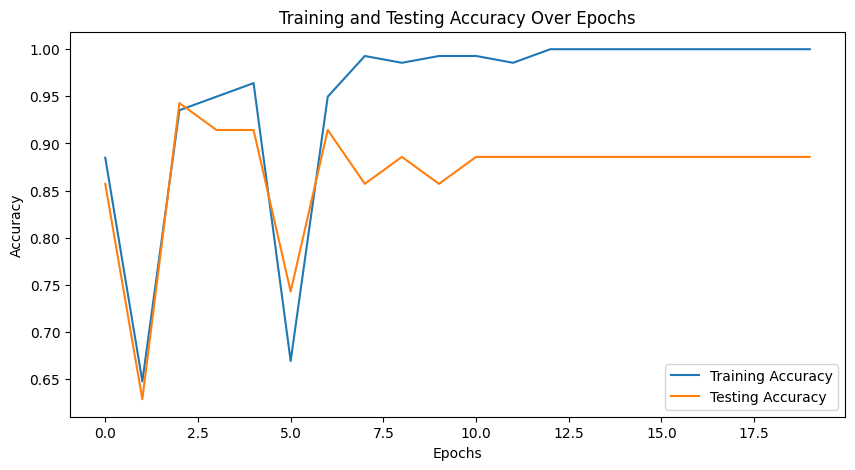

In [12]:
# Plot Test Accuracy vs Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), training_accuracies, label='Training Accuracy')
plt.plot(range(epochs), testing_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.legend()
plt.show()

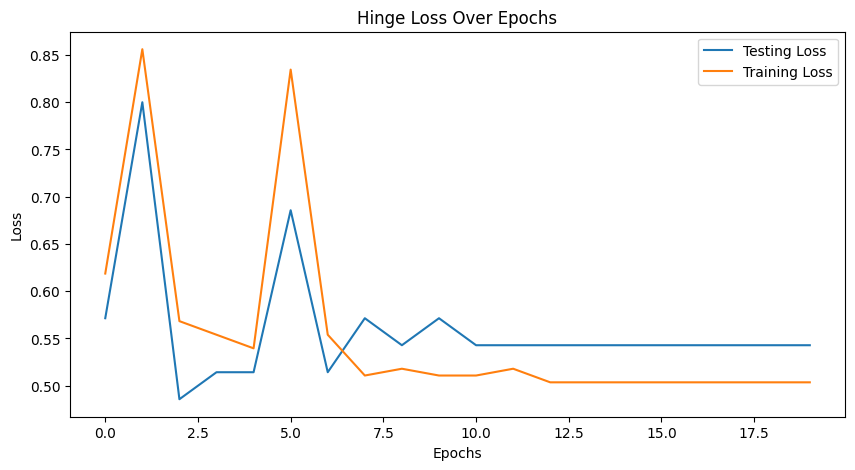

In [13]:
# Plot Testing Loss Over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), testing_losses, label='Testing Loss')
plt.plot(range(epochs), training_losses, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Hinge Loss Over Epochs')
plt.legend()
plt.show()

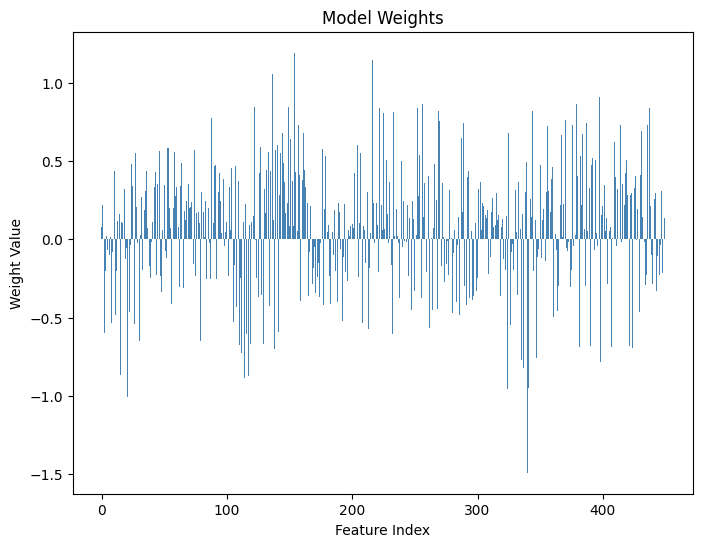

In [14]:
# Plot features and weights
plt.figure(figsize=(8, 6))
weights = model.coef_.flatten()
plt.bar(range(len(weights)), weights, color='steelblue')
plt.title('Model Weights')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.show()

                 Feature    Weight  Abs_Weight
340       pressure_var19 -1.489887    1.489887
154  mean_jerk_on_paper9  1.190950    1.190950
216           air_time13  1.142243    1.142243
136  mean_jerk_on_paper8  1.057461    1.057461
21        gmrt_on_paper2 -1.005229    1.005229


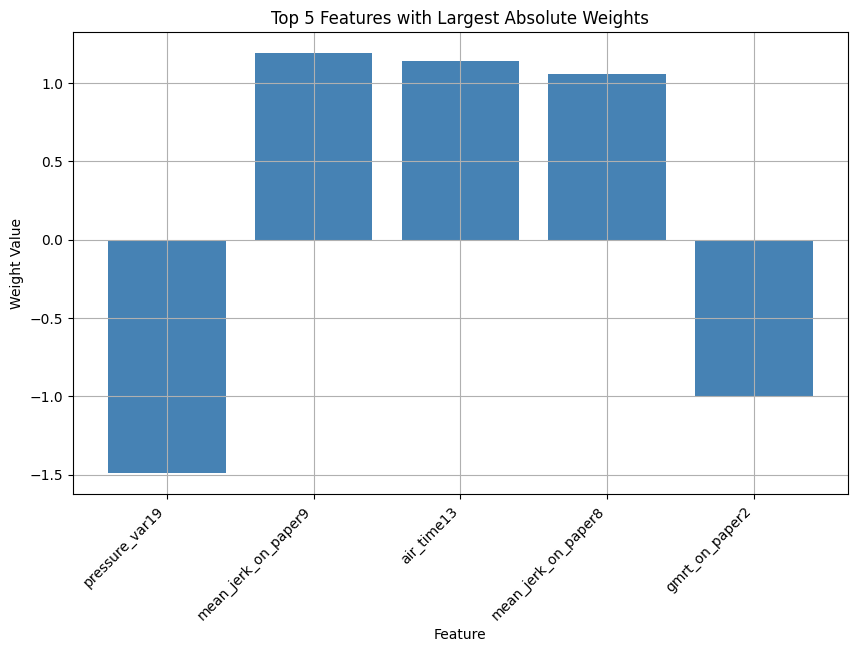

In [15]:
## See Most Important Features

feature_names = df.columns[:-1]
weights_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights})
weights_df['Abs_Weight'] = weights_df['Weight'].abs()
weights_df_sorted = weights_df.sort_values(by='Abs_Weight', ascending=False)
top_5_weights_df = weights_df_sorted.head(5)
print(top_5_weights_df)

plt.figure(figsize=(10, 6))
plt.bar(top_5_weights_df['Feature'], top_5_weights_df['Weight'], color='steelblue')
plt.xlabel('Feature')
plt.ylabel('Weight Value')
plt.title('Top 5 Features with Largest Absolute Weights')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Optimized Testing Accuracy: 0.89
Loss of Optimized Model: 0.54
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.90      0.90      0.90        20

    accuracy                           0.89        35
   macro avg       0.88      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35



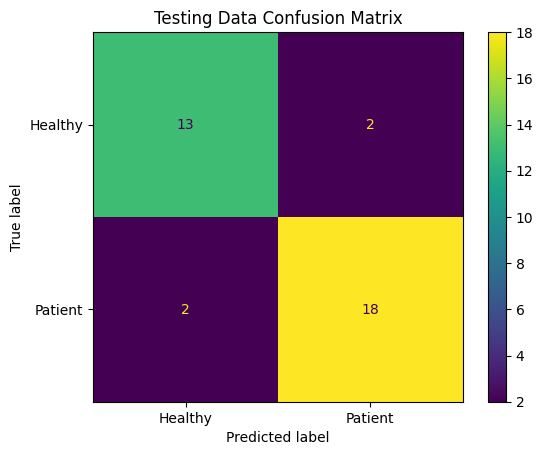

In [16]:
# Metrics and Classification Report of Optimized Model
print(f'Optimized Testing Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Loss of Optimized Model: {hinge_loss(y_test, y_pred):.2f}')

print(classification_report(y_test, y_pred))
cm_o= (confusion_matrix(y_test, y_pred))
cm_o_disp = ConfusionMatrixDisplay(confusion_matrix=cm_o, display_labels=['Healthy', 'Patient'])
cm_o_disp.plot()
plt.title('Testing Data Confusion Matrix')
plt.show()
